# **Week 12. Homework 8. Pandas**



---



---



---




1. Load the dataset into a pandas DataFrame and display the first few rows.

In [101]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("Startups.csv")

In [103]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94




---



---




2. Find the number of rows and columns in the dataset.




In [104]:
df.shape # 50 rows and 5 columns

(50, 5)

___

___




---


---



3. Check for missing values in each column and handle them appropriately.




In [105]:
df.isnull().sum() # there are no missing values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [106]:
# convert 0's to NAs and drop them

df.replace(0, np.nan, inplace=True)
df.dropna(inplace=True)

In [107]:
df.shape # Now there are only 46 rows and 5 columns

(46, 5)




---


---



4. Calculate the mean, median, and standard deviation of the 'R&D_Spend' column.



In [108]:
RSSpend_mean=df["R&D Spend"].mean()
RSSpend_median=df["R&D Spend"].median()
RSSpend_stdev=df["R&D Spend"].std()

print(f"The mean of the R&D Spend column is {RSSpend_mean}")
print(f"The median of the R&D Spend column is {RSSpend_median}")
print(f"The standard deviation of the R&D Spend column is {RSSpend_stdev}")

The mean of the R&D Spend column is 78241.71804347826
The median of the R&D Spend column is 74661.715
The standard deviation of the R&D Spend column is 43695.348335046765





---


---



5. Filter and create a new DataFrame containing companies located in a **California**.



In [109]:
new_df=df[df["State"]=="California"]
new_df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
6,134615.46,147198.87,127716.82,California,156122.51
9,123334.88,108679.17,304981.62,California,149759.96
11,100671.96,91790.61,249744.55,California,144259.40
13,91992.39,135495.07,252664.93,California,134307.35
16,78013.11,121597.55,264346.06,California,126992.93
20,76253.86,113867.30,298664.47,California,118474.03
25,64664.71,139553.16,137962.62,California,107404.34
32,63408.86,129219.61,46085.25,California,97427.84
34,46426.07,157693.92,210797.67,California,96712.80





---


---



6. Sort the dataset by 'Profit' in descending order.



In [110]:
df = df.sort_values(by="Profit", ascending=False)
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96





---


---



7. Group the data by 'State' and calculate the total 'Profit' for each state.



In [111]:
df_grouped=df.groupby("State")["Profit"].sum().reset_index()
df_grouped.head(10)

,State,Profit
0,California,1709146.85
1,Florida,1900384.39
2,New York,1775409.32





---


---



8. Create a bar chart to visualize the total 'Profit' by 'State.'



In [112]:
import seaborn as sns

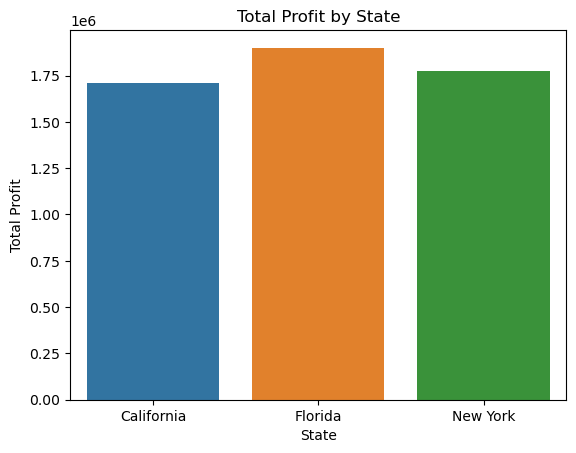

In [113]:
sns.barplot(data=df_grouped, x="State", y="Profit")
plt.xlabel("State")
plt.ylabel("Total Profit")
plt.title("Total Profit by State")
plt.show()




---


---



9. Calculate the correlation between 'R&D_Spend' and 'Profit.'



In [114]:
df["R&D Spend"].corr(df["Profit"])
# The correlation is 0.9777 which is really high

0.9777034670669672



---



---



---



10. Create a new column 'Total_Spend' that represents the sum of 'R&D_Spend,' 'Administration,' and 'Marketing_Spend' for each company.



In [115]:
df["Total_Spend"]=df["R&D Spend"]+df["Administration"]+df["Marketing Spend"]
df.head(10)


,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97
6,134615.46,147198.87,127716.82,California,156122.51,409531.15
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76
9,123334.88,108679.17,304981.62,California,149759.96,536995.67


11. Calculate the average **R&D_Spend**, **Administration**, and **Marketing_Spend** for companies located in each **State**



In [116]:
avg_by_state=df.groupby("State").agg({
    "R&D Spend":"mean",
    "Administration":"mean",
    "Marketing Spend":"mean"
}).reset_index()
avg_by_state.head(10)

,State,R&D Spend,Administration,Marketing Spend
0,California,73278.697333,120018.660000,203868.182667
1,Florida,80724.016250,121768.897500,247323.551250
2,New York,80556.954000,124065.449333,232725.484667




---



---



12. Create a histogram to visualize the distribution of 'Profit.'



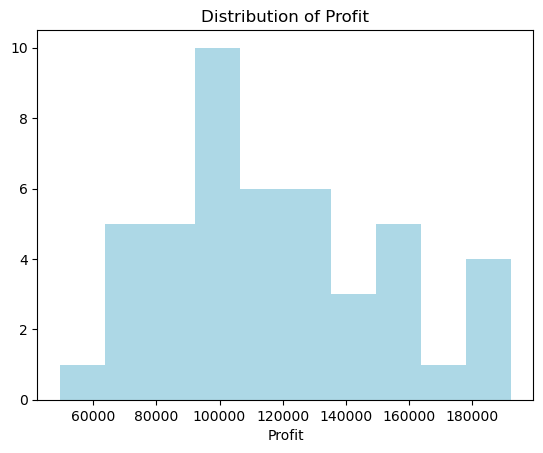

In [117]:
plt.hist(df["Profit"], bins=10, color='lightblue')
plt.xlabel("Profit")
plt.title("Distribution of Profit")
plt.show()



---



---



13. Filter the dataset to include only companies with 'R&D_Spend' greater than a 12000.



In [118]:
df_filtered=df[df["R&D Spend"]>12000]
df_filtered.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97
6,134615.46,147198.87,127716.82,California,156122.51,409531.15
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76
9,123334.88,108679.17,304981.62,California,149759.96,536995.67




---



---



14. Calculate the total 'Profit' for companies with 'Marketing_Spend' above a certain threshold.



In [119]:
df_threshold=df[df["Marketing Spend"]>25000]
df_totalprofit=df["Profit"].sum()
print(f"The total profit for companies with market spending over $25000 is ${df_totalprofit.round()}")

The total profit for companies with market spending over $25000 is $5384941.0


15. Replace any missing values in the 'Marketing_Spend' column with the mean spending of the dataset.



In [120]:
df_replaced=pd.read_csv("Startups.csv")

In [121]:
mean_spending=df_replaced["Marketing Spend"].mean()
df_replaced.replace(0, np.nan, inplace=True)
df_replaced["Marketing Spend"].fillna(mean_spending, inplace=True)
df_replaced.tail(10)

# Row 47 and 48 used to have a marketing spend of 0, but now they are replaced with the mean marketing spend 

,R&D Spend,Administration,Marketing Spend,State,Profit
40,28754.33,118546.05,172795.6700,California,78239.91
41,27892.92,84710.77,164470.7100,Florida,77798.83
42,23640.93,96189.63,148001.1100,California,71498.49
43,15505.73,127382.30,35534.1700,New York,69758.98
44,22177.74,154806.14,28334.7200,California,65200.33
45,1000.23,124153.04,1903.9300,New York,64926.08
46,1315.46,115816.21,297114.4600,Florida,49490.75
47,NaN,135426.92,211025.0978,California,42559.73
48,542.05,51743.15,211025.0978,New York,35673.41
49,NaN,116983.80,45173.0600,California,14681.40





---


---



16. Create a new column 'Profit_Margin' that represents the profit margin for each company (Profit / Total_Spend).



In [122]:
df["Profit_Margin"]=df["Profit"]/df["Total_Spend"]
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,Profit_Margin
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,0.248390
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,0.253066
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,0.288369
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88,0.283023
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53,0.277133
5,131876.90,99814.71,362861.36,New York,156991.12,594552.97,0.264049
6,134615.46,147198.87,127716.82,California,156122.51,409531.15,0.381223
7,130298.13,145530.06,323876.68,Florida,155752.60,599704.87,0.259715
8,120542.52,148718.95,311613.29,New York,152211.77,580874.76,0.262039
9,123334.88,108679.17,304981.62,California,149759.96,536995.67,0.278885




---



---



---



17. Sort the dataset by 'Profit_Margin' in descending order.



In [123]:
df=df.sort_values(by="Profit_Margin",ascending=False)
df.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit,Total_Spend,Profit_Margin
45,1000.23,124153.04,1903.93,New York,64926.08,127057.20,0.510999
32,63408.86,129219.61,46085.25,California,97427.84,238713.72,0.408137
43,15505.73,127382.30,35534.17,New York,69758.98,178422.20,0.390977
6,134615.46,147198.87,127716.82,California,156122.51,409531.15,0.381223
30,61994.48,115641.28,91131.24,Florida,99937.59,268767.00,0.371837
24,77044.01,99281.34,140574.81,New York,108552.04,316900.16,0.342543
10,101913.08,110594.11,229160.95,Florida,146121.95,441668.14,0.330841
11,100671.96,91790.61,249744.55,California,144259.40,442207.12,0.326226
31,61136.38,152701.92,88218.23,New York,97483.56,302056.53,0.322733
44,22177.74,154806.14,28334.72,California,65200.33,205318.60,0.317557




---



---



18. Calculate the average profit margin for companies in each 'State' and create a bar chart to display it.



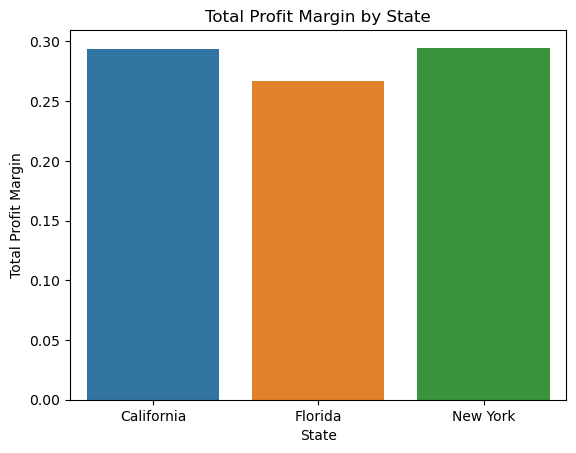

In [124]:
avg_profit_margin=df.groupby("State")["Profit_Margin"].mean().reset_index()
sns.barplot(data=avg_profit_margin, x="State", y="Profit_Margin")
plt.xlabel("State")
plt.ylabel("Total Profit Margin")
plt.title("Total Profit Margin by State")
plt.show()



---



---



---



19. Find the maximum 'R&D_Spend' in each **State**.



In [125]:
max_rdspend=df.groupby("State")["R&D Spend"].max().reset_index()
max_rdspend.head(10)

,State,R&D Spend
0,California,162597.70
1,Florida,153441.51
2,New York,165349.20


___